In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
combined_data = pd.read_csv('cleaned_data.csv')

In [28]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [29]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

## SVM

In [32]:
from sklearn.svm import SVR
svm = SVR(C = 2.0, epsilon = 0.1, kernel = 'rbf', gamma = 0.5, 
           tol = 0.001, verbose=False, shrinking=True, max_iter = 10000)
regr=svm.fit(X_train, y_train)

In [33]:
f'Coefficient of determination R^2 on train set {regr.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set -0.0839621903336174'

In [34]:
f'Coefficient of determination R^2 on test set {regr.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set -0.24390321086313363'

### OVERFIT MODEL

In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regr, X, y, cv = 3)

In [36]:
score.mean()

-0.14820005039846942

In [37]:
pred = regr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


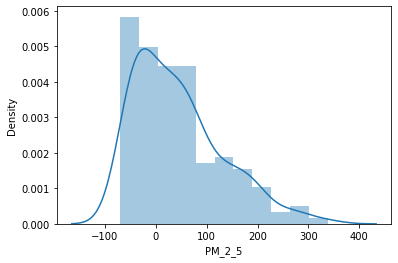

In [38]:
sns.distplot(y_test - pred)

#### HYPERPARAMETER TUNING

In [39]:
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

In [41]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(svm, params, scoring='neg_mean_squared_error', cv=3,refit = True, verbose = 3)
search.fit(X,y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-7753.020, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-9508.313, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-6588.204, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=-7722.224, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=-9431.070, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=-6557.709, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ... C=0.1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] . C=0.1, gamma=0.0001, kernel=rbf, score=-9499.241, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] . C=0.1, gamma=0.0001, kernel=rbf, score=-6582.230, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ........ C=1, gamma=1, kernel=rbf, score=-7751.864, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ........ C=1, gamma=1, kernel=rbf, score=-9488.152, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ........ C=1, gamma=1, kernel=rbf, score=-6584.462, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ...... C=1, gamma=0.1, kernel=rbf, score=-7483.022, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ...... C=1, gamma=0.1, kernel=rbf, score=-9027.031, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=2.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma=0.5, kernel='rbf', max_iter=10000,
                           shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [42]:
search.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [43]:
search.best_score_

-4174.887447796999

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


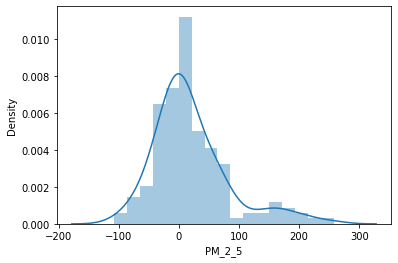

In [44]:
pred = search.predict(X_test)
sns.distplot(y_test-pred)

In [45]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 44.5348280173599
Mean Sq Error: 4449.93360462266
Root Mean Error: 66.70782266438218


In [46]:
search.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=10000, shrinking=True, tol=0.001, verbose=False)

In [47]:
import pickle
pickle.dump(search, open('svm.pkl', 'wb'))